In [1]:
!pip install torchviz

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

noise = np.random.rand(1, 10000)

def np_noise(up_to_index):
  return noise[:, :up_to_index]

def torch_noise(up_to_index):
  return torch.from_numpy(noise[:, :up_to_index].astype(np.float32))

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=794f1bc50dc0ee419f3dda50f15f498c0f39528ee1d666744c629a49e4be1f19
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
x = np.linspace(-1 * 5, 5, 1000)
x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
y = np.cos(x) + np_noise(1000)
y_torch = torch.add(torch.cos(x_torch), torch_noise(1000))
print(x.shape)
print(x_torch.shape)
print(y.shape)
print(y_torch.shape)

def run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000, np_func = np.cos, torch_func = torch.cos,
        model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)), learning_rate = 0.005,
        number_of_iterations = 10):
  x = np.linspace(-1 * train_bound, train_bound, number_of_train_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = np_func(x) + np_noise(number_of_train_points)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_train_points))

  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  loss_func = nn.MSELoss()

  losses = []
  for i in range(0, number_of_iterations):
    optimizer.zero_grad()
    loss = loss_func(model(x_torch), y_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  print(losses)

  x = np.linspace(-1 * test_bound, test_bound, number_of_test_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = (np_func(x) + np_noise(number_of_test_points)).reshape(-1)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_test_points))

  plt.plot(x, y, 'g', label = 'Original Function')
  plt.plot(x_torch.detach().numpy().flatten(), model(x_torch).detach().numpy().flatten(), 'r', label = 'Predicted Function')
  plt.show()

(1000,)
torch.Size([1000, 1])
(1, 1000)
torch.Size([1000, 1000])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.0849676132202148, 0.8249920010566711, 0.7041552066802979, 0.71238774061203, 0.755423903465271, 0.748748242855072, 0.6906248331069946, 0.6191436648368835, 0.5646100640296936, 0.5343694090843201, 0.5210390686988831, 0.5148425698280334, 0.5076574087142944, 0.4937698543071747, 0.47058242559432983, 0.4405405819416046, 0.41142961382865906, 0.39138150215148926, 0.38257500529289246, 0.38005754351615906, 0.376834899187088, 0.3693386912345886, 0.3581392765045166, 0.3453485071659088, 0.33286920189857483, 0.3226970136165619, 0.3166641592979431, 0.3145650625228882, 0.3134818971157074, 0.31018882989883423, 0.3040452003479004, 0.2969079911708832, 0.2907480001449585, 0.28622791171073914, 0.28324219584465027, 0.2813986539840698, 0.27962198853492737, 0.276509553194046, 0.27178001403808594, 0.2667043209075928, 0.26263919472694397, 0.25971731543540955, 0.25728553533554077, 0.2548138499259949, 0.2519278824329376, 0.24837273359298706, 0.2444918155670166, 0.24110576510429382, 0.2385295033454895, 0.2362633

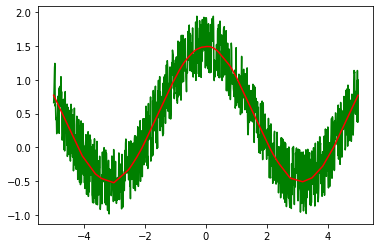

In [3]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([20, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.3289268016815186, 0.8866592645645142, 0.6233515739440918, 0.5188429355621338, 0.5527284145355225, 0.6343130469322205, 0.6783410906791687, 0.6656520366668701, 0.6166755557060242, 0.5543465614318848, 0.4931035339832306, 0.44499465823173523, 0.4202197790145874, 0.4202721416950226, 0.4351363778114319, 0.449489951133728, 0.45311447978019714, 0.4445737600326538, 0.4272788166999817, 0.40534141659736633, 0.38277867436408997, 0.3647381663322449, 0.35548675060272217, 0.35529643297195435, 0.35984814167022705, 0.363744854927063, 0.36383816599845886, 0.35980474948883057, 0.3522016108036041, 0.34209808707237244, 0.33182522654533386, 0.32436177134513855, 0.3210011422634125, 0.32047343254089355, 0.32056480646133423, 0.3197849988937378, 0.31749671697616577, 0.3133070468902588, 0.3074356019496918, 0.30123692750930786, 0.2963336110115051, 0.29318293929100037, 0.29116296768188477, 0.2895572781562805, 0.28781986236572266, 0.28530219197273254, 0.2816799581050873, 0.2774752676486969, 0.27352282404899597, 

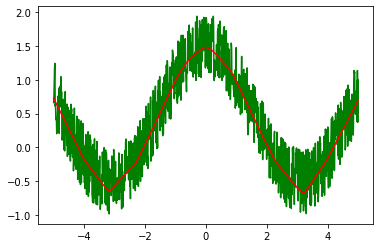

In [4]:
run(train_bound = 5, number_of_train_points = 20, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2.7603049278259277, 2.5969724655151367, 2.442908763885498, 2.2979118824005127, 2.1617414951324463, 2.0341098308563232, 1.9146881103515625, 1.8031121492385864, 1.6989784240722656, 1.6018558740615845, 1.5112853050231934, 1.4268516302108765, 1.3486074209213257, 1.2762680053710938, 1.209444522857666, 1.1477572917938232, 1.0908379554748535, 1.0383272171020508, 0.9898754358291626, 0.9450894594192505, 0.9035155773162842, 0.864884614944458, 0.8289592862129211, 0.795525074005127, 0.7643887400627136, 0.7353773713111877, 0.7083370089530945, 0.6831306219100952, 0.6596362590789795, 0.6377456784248352, 0.6173632740974426, 0.5984028577804565, 0.5807888507843018, 0.5644519329071045, 0.5493291020393372, 0.5353628993034363, 0.5224997997283936, 0.5106891989707947, 0.49988219141960144, 0.49003085494041443, 0.4810882806777954, 0.4730072319507599, 0.46574002504348755, 0.4592383801937103, 0.453453004360199, 0.4483335018157959, 0.44382861256599426, 0.4398863613605499, 0.43645429611206055, 0.43347981572151184

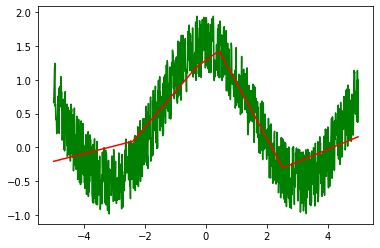

In [5]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0.58875572681427, 0.5765824317932129, 0.5661506056785583, 0.5566873550415039, 0.5473335385322571, 0.5385137796401978, 0.5298653841018677, 0.5216379165649414, 0.5138180255889893, 0.505368709564209, 0.49587076902389526, 0.48608461022377014, 0.4759643077850342, 0.4651530981063843, 0.45390158891677856, 0.4424041509628296, 0.4307658076286316, 0.4189292788505554, 0.4064733684062958, 0.3932564854621887, 0.3794446587562561, 0.36523324251174927, 0.3507762849330902, 0.3361431062221527, 0.32149118185043335, 0.306927889585495, 0.29232192039489746, 0.2776006758213043, 0.26311731338500977, 0.24935589730739594, 0.23668962717056274, 0.2245240956544876, 0.21281790733337402, 0.2021954506635666, 0.19269688427448273, 0.18388524651527405, 0.17630484700202942, 0.17027010023593903, 0.1656801402568817, 0.16203728318214417, 0.15887075662612915, 0.15608656406402588, 0.1538493037223816, 0.15218181908130646, 0.15071658790111542, 0.14896680414676666, 0.1468273401260376, 0.14454829692840576, 0.14221151173114777, 0

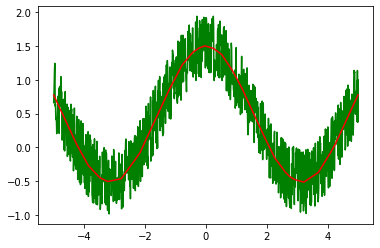

In [6]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 20), nn.ReLU(), nn.Linear(20, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

[2.037446975708008, 1.3542357683181763, 0.9585151076316833, 0.7944097518920898, 0.7710726261138916, 0.8098081350326538, 0.8516176342964172, 0.8616199493408203, 0.8314176201820374, 0.7704393267631531]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


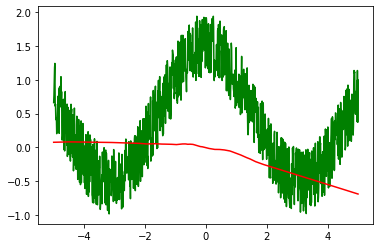

In [7]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.196155071258545, 0.8246139287948608, 0.949409544467926, 0.938368558883667, 0.847213625907898, 0.7684412598609924, 0.7427768111228943, 0.7732848525047302, 0.8001278042793274, 0.7750126123428345, 0.7115795016288757, 0.6663844585418701, 0.6717647314071655, 0.7012333273887634, 0.706204891204834, 0.6752977967262268, 0.6379178762435913, 0.6234720349311829, 0.6314640641212463, 0.6400684118270874, 0.6346574425697327, 0.6192572712898254, 0.6051080822944641, 0.5978047847747803, 0.5966065526008606, 0.5981635451316833, 0.5979043245315552, 0.592181384563446, 0.5824244022369385, 0.5754721760749817, 0.5759816765785217, 0.5798761248588562, 0.5791584849357605, 0.5723875761032104, 0.5660216212272644, 0.5652065277099609, 0.5675119161605835, 0.5675423741340637, 0.5642444491386414, 0.5607371926307678, 0.5592318773269653, 0.5591391324996948, 0.5590527653694153, 0.5581567883491516, 0.5562519431114197, 0.5540798902511597, 0.5530092120170593, 0.5531471371650696, 0.5527880787849426, 0.5508829951286316, 0.548

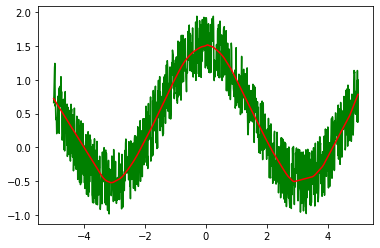

In [8]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.0071560144424438, 0.7343587279319763, 0.7368414402008057, 0.7276101112365723, 0.6772416234016418, 0.6265050172805786, 0.5941506624221802, 0.5666465163230896, 0.5293922424316406, 0.487496554851532, 0.45468008518218994, 0.437967449426651, 0.43150830268859863, 0.4219644367694855, 0.4014410078525543, 0.37423962354660034, 0.3513474464416504, 0.3402579128742218, 0.3391205668449402, 0.33955755829811096, 0.33497846126556396, 0.32565003633499146, 0.3165297508239746, 0.31162628531455994, 0.3105888366699219, 0.3102564513683319, 0.3086013197898865, 0.3062453866004944, 0.30456283688545227, 0.3034527003765106, 0.30152565240859985, 0.2981717586517334, 0.29459962248802185, 0.29241520166397095, 0.2915860712528229, 0.2903760075569153, 0.28738388419151306, 0.28318968415260315, 0.2796272933483124, 0.27768009901046753, 0.2765200138092041, 0.2746872901916504, 0.27179887890815735, 0.268748939037323, 0.2664508521556854, 0.26485371589660645, 0.26329219341278076, 0.26142603158950806, 0.2594875395298004, 0.25

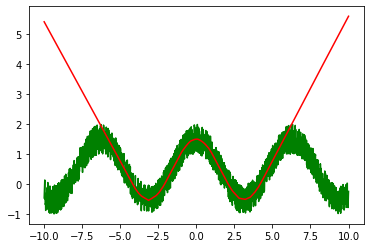

In [9]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

In [10]:
def np_polynomial(x):
  return 2 * x ** 3 + 3 * x ** 2 + 4 * x + 1

def torch_polynomial(x):
  return torch.add(torch.add(torch.add(torch.mul(torch.pow(x, 3), 2), torch.mul(torch.pow(x, 2), 3)), torch.mul(x, 4)), 1)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12311.5595703125, 12004.8251953125, 11702.802734375, 11404.123046875, 11107.5126953125, 10811.6201171875, 10515.123046875, 10216.865234375, 9915.92578125, 9611.6513671875, 9303.6650390625, 8991.8759765625, 8676.4462890625, 8357.7373046875, 8036.26416015625, 7712.69775390625, 7387.8779296875, 7062.86474609375, 6738.71875, 6416.5615234375, 6097.5869140625, 5783.07568359375, 5474.39599609375, 5172.86376953125, 4879.7939453125, 4596.49658203125, 4324.25146484375, 4064.26171875, 3817.602294921875, 3585.160400390625, 3367.643798828125, 3165.571533203125, 2979.26025390625, 2808.8271484375, 2654.204345703125, 2515.163818359375, 2391.349853515625, 2282.319580078125, 2187.55126953125, 2106.4296875, 2038.2705078125, 1982.3074951171875, 1937.6729736328125, 1903.37890625, 1878.3106689453125, 1861.2286376953125, 1850.792724609375, 1845.5972900390625, 1844.221435546875, 1845.2884521484375, 1847.5205078125, 1849.7919921875, 1851.16943359375, 1850.934326171875, 1848.5936279296875, 1843.87353515625, 18

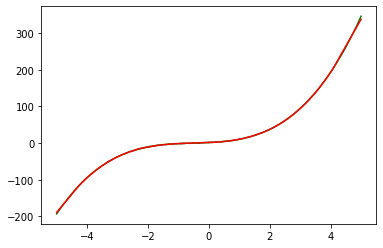

In [11]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[20475.33984375, 20016.412109375, 19562.63671875, 19112.37890625, 18663.904296875, 18215.724609375, 17766.154296875, 17313.724609375, 16857.4296875, 16396.345703125, 15929.923828125, 15457.8974609375, 14980.474609375, 14497.9462890625, 14010.77734375, 13519.7490234375, 13025.830078125, 12530.3759765625, 12034.5595703125, 11539.6416015625, 11047.2216796875, 10558.7802734375, 10075.869140625, 9600.1279296875, 9133.2333984375, 8677.072265625, 8233.244140625, 7803.20068359375, 7388.5341796875, 6990.76953125, 6610.94140625, 6250.10107421875, 5909.13671875, 5588.6650390625, 5289.08251953125, 5010.75732421875, 4753.48486328125, 4517.048828125, 4301.14453125, 4105.37890625, 3929.234619140625, 3772.1572265625, 3633.530517578125, 3512.663818359375, 3408.8671875, 3321.33935546875, 3249.099365234375, 3190.9599609375, 3145.626953125, 3111.72021484375, 3087.7412109375, 3072.057861328125, 3062.936767578125, 3058.723388671875, 3057.795654296875, 3058.743408203125, 3060.311279296875, 3061.315673828125,

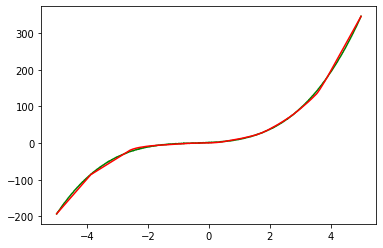

In [12]:
run(train_bound = 5, number_of_train_points = 10, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([5, 5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[32404.779296875, 31738.1796875, 31078.537109375, 30423.154296875, 29769.720703125, 29115.48046875, 28458.705078125, 27796.046875, 27126.193359375, 26447.42578125, 25758.390625, 25058.427734375, 24347.29296875, 23625.48828125, 22893.498046875, 22152.0859375, 21402.2109375, 20645.068359375, 19882.0703125, 19114.80859375, 18344.994140625, 17574.484375, 16805.560546875, 16040.384765625, 15281.119140625, 14529.8837890625, 13789.09765625, 13061.1689453125, 12348.5322265625, 11653.6298828125, 10978.9365234375, 10326.8720703125, 9699.74609375, 9099.787109375, 8529.0341796875, 7989.14892578125, 7481.458984375, 7007.3349609375, 6567.64892578125, 6162.88330078125, 5793.15869140625, 5458.271484375, 5157.59765625, 4890.18603515625, 4654.7734375, 4449.818359375, 4273.58154296875, 4124.11767578125, 3999.36572265625, 3897.1474609375, 3815.166259765625, 3751.22216796875, 3703.01025390625, 3668.25, 3644.68896484375, 3630.139404296875, 3622.515380859375, 3619.859130859375, 3620.390625, 3622.532470703125

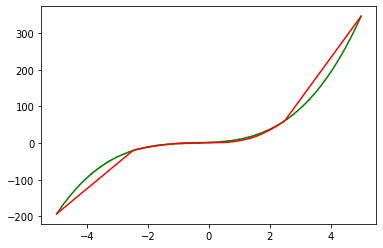

In [13]:
run(train_bound = 5, number_of_train_points = 5, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[13188.5595703125, 13172.8017578125, 13157.21484375, 13141.7998046875, 13126.560546875, 13111.498046875, 13096.611328125, 13081.900390625, 13067.3671875, 13053.005859375, 13038.8125, 13024.7900390625, 13010.9267578125, 12997.21875, 12983.662109375, 12970.2451171875, 12956.9609375, 12943.8017578125, 12930.775390625, 12918.1220703125, 12905.7763671875, 12893.4736328125, 12881.1953125, 12868.9296875, 12856.662109375, 12844.3759765625, 12831.970703125, 12819.3779296875, 12806.5927734375, 12793.6015625, 12780.396484375, 12766.9716796875, 12753.3203125, 12739.431640625, 12725.2880859375, 12710.869140625, 12696.1484375, 12681.1015625, 12665.69921875, 12649.9169921875, 12633.7255859375, 12617.1005859375, 12600.0205078125, 12582.4638671875, 12564.4130859375, 12545.8447265625, 12526.7470703125, 12507.103515625, 12486.8974609375, 12466.1181640625, 12444.75, 12422.78125, 12400.2001953125, 12376.9970703125, 12353.158203125, 12328.6787109375, 12303.544921875, 12277.75, 12251.2880859375, 12224.149414

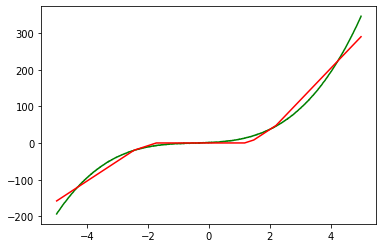

In [14]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12938.19140625, 12929.7900390625, 12921.6748046875, 12913.576171875, 12905.2607421875, 12896.4765625, 12886.84765625, 12876.240234375, 12864.5556640625, 12851.693359375, 12837.55078125, 12822.04296875, 12805.0791015625, 12786.564453125, 12766.3994140625, 12744.634765625, 12722.2138671875, 12698.6884765625, 12673.630859375, 12646.8076171875, 12618.048828125, 12587.2236328125, 12554.2080078125, 12518.8818359375, 12481.1279296875, 12440.8291015625, 12397.8603515625, 12352.107421875, 12303.4443359375, 12251.748046875, 12196.8994140625, 12138.771484375, 12077.2412109375, 12012.189453125, 11943.4931640625, 11871.0322265625, 11794.69140625, 11714.3583984375, 11629.923828125, 11541.2841796875, 11448.3408203125, 11350.998046875, 11249.1748046875, 11142.806640625, 11031.7822265625, 10916.087890625, 10795.6640625, 10670.4716796875, 10540.494140625, 10405.72265625, 10266.166015625, 10121.8515625, 9972.8232421875, 9819.1435546875, 9660.89453125, 9498.18359375, 9331.1376953125, 9159.908203125, 8984

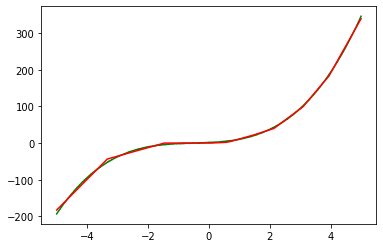

In [15]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

[12227.0146484375, 11924.802734375, 11625.7421875, 11328.884765625, 11033.25390625, 10737.7763671875, 10441.5166015625, 10143.6806640625, 9843.689453125, 9541.1787109375]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


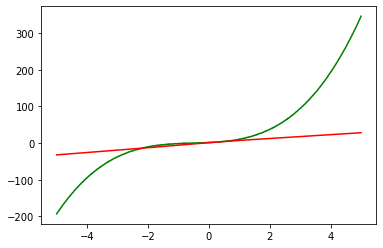

In [16]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[622163.875, 617576.25, 612979.6875, 608355.75, 603687.1875, 598956.0, 594144.5625, 589237.125, 584218.25, 579074.625, 573794.5625, 568369.4375, 562792.375, 557057.8125, 551162.4375, 545103.6875, 538880.25, 532491.375, 525937.1875, 519218.0, 512335.15625, 505290.3125, 498085.84375, 490724.59375, 483209.875, 475545.5625, 467736.15625, 459786.90625, 451703.5625, 443492.75, 435161.6875, 426719.40625, 418174.65625, 409536.40625, 400814.21875, 392018.4375, 383160.0, 374250.28125, 365301.375, 356325.625, 347336.03125, 338345.90625, 329369.0, 320419.3125, 311511.125, 302658.9375, 293877.5, 285181.5, 276585.75, 268104.9375, 259753.625, 251546.234375, 243496.859375, 235619.1875, 227926.453125, 220431.3125, 213145.8125, 206081.265625, 199248.046875, 192655.75, 186312.921875, 180226.984375, 174404.265625, 168849.890625, 163567.65625, 158560.09375, 153828.453125, 149372.53125, 145190.828125, 141280.5625, 137637.546875, 134256.40625, 131130.59375, 128252.453125, 125613.2890625, 123203.484375, 12101

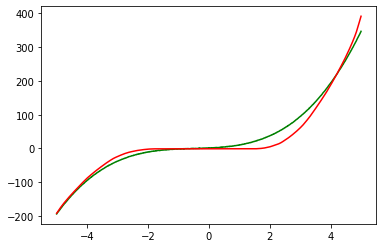

In [17]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12152.4775390625, 11833.1083984375, 11517.435546875, 11204.2822265625, 10892.2802734375, 10580.37109375, 10267.7919921875, 9953.8701171875, 9638.021484375, 9319.8388671875, 8999.158203125, 8676.0009765625, 8350.5888671875, 8023.4169921875, 7695.16748046875, 7366.59326171875, 7038.61083984375, 6712.22216796875, 6388.521484375, 6068.7001953125, 5753.97216796875, 5445.60498046875, 5144.89306640625, 4853.14208984375, 4571.66455078125, 4301.72998046875, 4044.493408203125, 3801.004150390625, 3572.199951171875, 3358.82568359375, 3161.40576171875, 2980.2509765625, 2815.45263671875, 2666.888671875, 2534.246337890625, 2417.05224609375, 2314.701904296875, 2226.494384765625, 2151.651123046875, 2089.324462890625, 2038.5987548828125, 1998.483154296875, 1967.9014892578125, 1945.6910400390625, 1930.604248046875, 1921.334716796875, 1916.5418701171875, 1914.8997802734375, 1915.14208984375, 1916.1134033203125, 1916.8094482421875, 1916.4110107421875, 1914.3023681640625, 1910.079833984375, 1903.5465087890

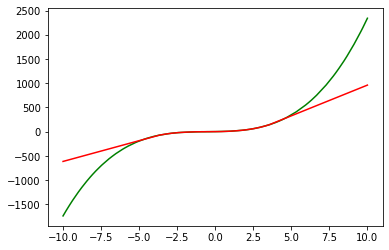

In [18]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)

In [19]:
def np_func3(x):
  return np.cos(2 * x) + np.sin(x)

def torch_func3(x):
  return torch.add(torch.cos(torch.mul(x, 2)), torch.sin(x))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.5321530103683472, 1440.763916015625, 66.05809020996094, 191.98715209960938, 431.0339660644531, 352.26055908203125, 184.21029663085938, 71.1078109741211, 20.710962295532227, 6.947616100311279, 5.906039237976074, 5.936905860900879, 4.928366661071777, 3.9899468421936035, 4.454770088195801, 6.091392517089844, 6.935456275939941, 5.883277893066406, 4.069704532623291, 3.2001845836639404, 3.7767739295959473, 4.745143413543701, 4.579344272613525, 3.2466533184051514, 2.184478282928467, 2.368316650390625, 3.144899845123291, 3.2325034141540527, 2.3467140197753906, 1.472355842590332, 1.368952989578247, 1.6913210153579712, 1.7649776935577393, 1.3587480783462524, 0.9000744819641113, 0.8195008635520935, 1.0246331691741943, 1.1101713180541992, 0.9058419466018677, 0.6410524845123291, 0.5907045602798462, 0.7249390482902527, 0.7925848364830017, 0.6748112440109253, 0.5190421342849731, 0.5000265836715698, 0.5848351120948792, 0.6129608154296875, 0.5294663906097412, 0.43729808926582336, 0.4326566457748413,

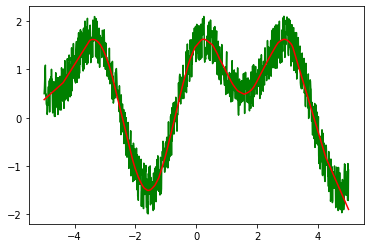

In [20]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([20, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2.7463436126708984, 1353.7181396484375, 60.64045333862305, 343.48028564453125, 434.7156982421875, 271.7020263671875, 122.41400146484375, 59.12215805053711, 43.56129455566406, 33.722076416015625, 17.827651977539062, 3.8225793838500977, 2.1927318572998047, 13.72529411315918, 25.310365676879883, 24.425443649291992, 13.600603103637695, 3.835688829421997, 3.348506450653076, 10.079521179199219, 13.435988426208496, 9.825507164001465, 3.8691136837005615, 1.6280921697616577, 4.099228382110596, 6.988342761993408, 6.413020133972168, 3.3429672718048096, 1.3221546411514282, 1.8017301559448242, 3.328620195388794, 3.8584537506103516, 2.8373336791992188, 1.3745309114456177, 0.8131672143936157, 1.3891428709030151, 2.185542583465576, 2.256335973739624, 1.5644296407699585, 0.8538725972175598, 0.7704287171363831, 1.2089321613311768, 1.539750337600708, 1.3778735399246216, 0.9347975254058838, 0.66004478931427, 0.744276225566864, 0.9945256114006042, 1.0912357568740845, 0.929836094379425, 0.6944549679756165,

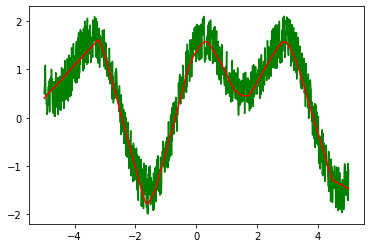

In [21]:
run(train_bound = 5, number_of_train_points = 20, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.6363307237625122, 2.017526865005493, 1.273116946220398, 1.8277703523635864, 1.3472472429275513, 1.0074816942214966, 1.1751651763916016, 1.3060978651046753, 1.2018777132034302, 1.026061773300171, 0.9377192258834839, 0.9786520004272461, 1.0646711587905884, 1.0693607330322266, 0.9873140454292297, 0.9062923789024353, 0.8846540451049805, 0.9101999998092651, 0.9308233261108398, 0.9055747389793396, 0.8480620384216309, 0.8074191212654114, 0.8102385997772217, 0.823305606842041, 0.8002251982688904, 0.7492662072181702, 0.7150444984436035, 0.714963436126709, 0.7141693830490112, 0.6788215041160583, 0.6391950845718384, 0.6385327577590942, 0.6418264508247375, 0.6070415377616882, 0.581375241279602, 0.5887271165847778, 0.5740064382553101, 0.5459930896759033, 0.5446786880493164, 0.5350896716117859, 0.5100215673446655, 0.4997583031654358, 0.4856610894203186, 0.46538132429122925, 0.4525165557861328, 0.44464004039764404, 0.4369295835494995, 0.4332312047481537, 0.4333565831184387, 0.42174196243286133, 0.

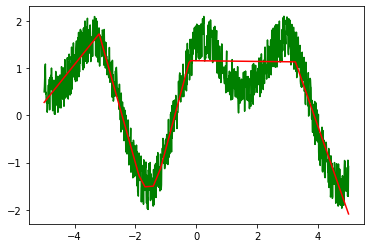

In [22]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 20), nn.ReLU(), nn.Linear(20, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.3068046569824219, 15.44890308380127, 38.96378707885742, 7.331336498260498, 2.1680796146392822, 1.268092393875122, 1.4412095546722412, 1.821984052658081, 1.438262701034546, 1.0826690196990967, 1.2687135934829712, 1.2178242206573486, 1.068052887916565, 1.1775670051574707, 1.2549052238464355, 1.149983525276184, 1.0301660299301147, 1.0722577571868896, 1.0720356702804565, 0.9339960813522339, 0.8940876126289368, 0.9503095746040344, 0.9079041481018066, 0.843997597694397, 0.8795216679573059, 0.8593971133232117, 0.7788947224617004, 0.7856743931770325, 0.77553790807724, 0.6985583305358887, 0.6887008547782898, 0.6768693327903748, 0.6237616539001465, 0.6275454759597778, 0.5952485799789429, 0.5586819648742676, 0.5646181106567383, 0.5123012661933899, 0.5109156370162964, 0.4806486964225769, 0.46699807047843933, 0.44527825713157654, 0.43089738488197327, 0.40736767649650574, 0.39000943303108215, 0.36044982075691223, 0.35885363817214966, 0.33147403597831726, 0.3344604969024658, 0.324749618768692, 0.3

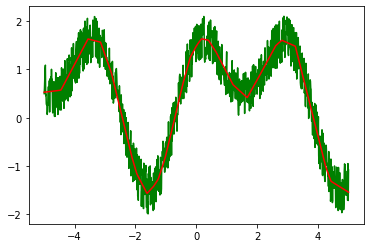

In [23]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 20), nn.ReLU(), nn.Linear(20, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2.722492218017578, 1431.4705810546875, 90.30757141113281, 102.79688262939453, 340.04412841796875, 337.6162414550781, 206.3134765625, 89.27897644042969, 26.856578826904297, 3.801525115966797, 2.0110669136047363, 7.114648818969727, 9.547780990600586, 7.742526531219482, 4.411952018737793, 2.561131238937378, 3.553335189819336, 6.396448612213135, 8.388898849487305, 7.636577129364014]


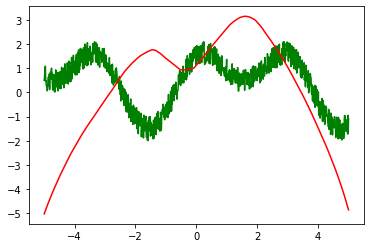

In [24]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 20)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2.8598036766052246, 5524.3857421875, 345.826171875, 423.4014587402344, 1398.0626220703125, 1371.6474609375, 813.3965454101562, 328.5539245605469, 80.69145965576172, 9.143385887145996, 22.515241622924805, 41.049617767333984, 31.896991729736328, 14.241938591003418, 19.451801300048828, 44.96040725708008, 56.733089447021484, 41.346893310546875, 23.340391159057617, 27.525365829467773, 43.40147018432617, 43.194618225097656, 27.239194869995117, 18.806386947631836, 25.83646583557129, 31.28798484802246, 23.304353713989258, 12.791439056396484, 12.669268608093262, 17.620275497436523, 15.674894332885742, 8.397658348083496, 5.697183132171631, 8.649550437927246, 9.433526039123535, 5.469491004943848, 2.558480978012085, 3.8921380043029785, 5.380293369293213, 3.736879348754883, 1.6660174131393433, 2.113100528717041, 3.344968318939209, 2.8111093044281006, 1.5581904649734497, 1.6503952741622925, 2.483795404434204, 2.393737554550171, 1.6431890726089478, 1.5582904815673828, 2.0774221420288086, 2.118476867

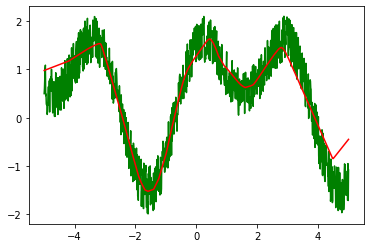

In [25]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.358912706375122, 1520.58740234375, 80.08222961425781, 138.28012084960938, 373.4563903808594, 303.6172790527344, 121.11781311035156, 14.217732429504395, 18.46132469177246, 81.33897399902344, 120.36141967773438, 109.62875366210938, 69.92558288574219, 30.46666717529297, 7.153981685638428, 2.569195508956909, 10.853302955627441, 19.522382736206055, 20.555679321289062, 14.642325401306152, 6.661863803863525, 1.7165234088897705, 2.3975982666015625, 6.889794826507568, 10.115028381347656, 9.539976119995117, 6.4582624435424805, 3.266660690307617, 1.511080265045166, 1.4377588033676147, 2.3282010555267334, 3.239539384841919, 3.564138174057007, 3.1842904090881348, 2.382474899291992, 1.5921156406402588, 1.155322551727295, 1.1344724893569946, 1.3256009817123413, 1.4720516204833984, 1.4604572057724, 1.3420641422271729, 1.205446720123291, 1.0865721702575684, 0.9839876294136047, 0.8957644104957581, 0.818864643573761, 0.7570473551750183, 0.7210071086883545, 0.7172451019287109, 0.7378445863723755, 0.760

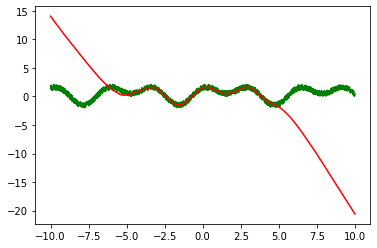

In [26]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)